In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima.arima import ndiffs,nsdiffs
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
taxagroups = pd.read_csv('CREMP_Pcover_2023_TaxaGroups.csv')
print(taxagroups.head())
print(taxagroups.info())
print(taxagroups.isna().sum())
coral_cover_trend=taxagroups.groupby('Year')['Stony_coral'].mean().reset_index()

coral_cover_trend['Year'] = pd.to_datetime(coral_cover_trend['Year'], format='%Y')

coral_cover_trend.set_index('Year', inplace=True)
coral_cover_trend.head()

   Year       Date Subregion Habitat  SiteID    Site_name  StationID  \
0  1996  7/25/1996        UK      HB      10  Rattlesnake        101   
1  1996  7/25/1996        UK      HB      10  Rattlesnake        102   
2  1996  7/25/1996        UK      HB      10  Rattlesnake        103   
3  1996  7/25/1996        UK      HB      10  Rattlesnake        104   
4  1996  7/22/1996        UK      HB      11   El Radabob        111   

  Surveyed_all_years  points  Cyanobacteria  Macroalgae  Octocoral  Others  \
0                  N     479            NaN      0.1587     0.0230     0.0   
1                  N     525            NaN      0.2476     0.0400     0.0   
2                  N     558            NaN      0.0323     0.0412     0.0   
3                  N     446            NaN      0.4260     0.0493     0.0   
4                  N     450            NaN      0.3156     0.0067     0.0   

   Porifera  Seagrass  Stony_coral  Substrate  Unknown  Urchins  Zoanthidea  
0    0.0125    0.004

,Stony_coral
Year,
1996-01-01,0.106905
1997-01-01,0.102122
1998-01-01,0.085853
1999-01-01,0.066199
2000-01-01,0.067354


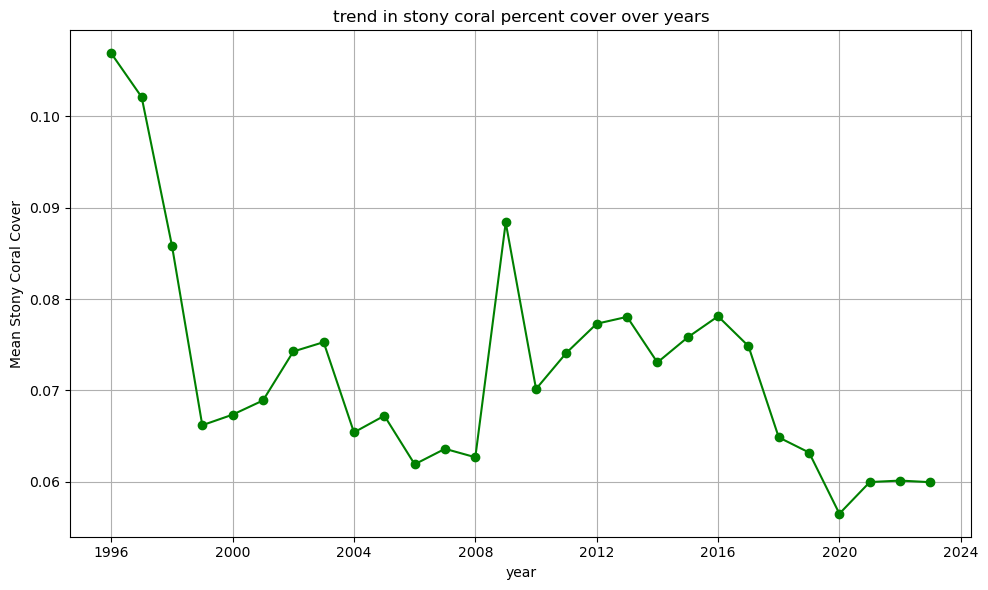

In [13]:
plt.figure(figsize=(10,6))
plt.plot(coral_cover_trend,color='green',marker='o')

plt.title('trend in stony coral percent cover over years')
plt.xlabel('year')
plt.ylabel('Mean Stony Coral Cover')
plt.grid(True)
plt.tight_layout()
plt.show()


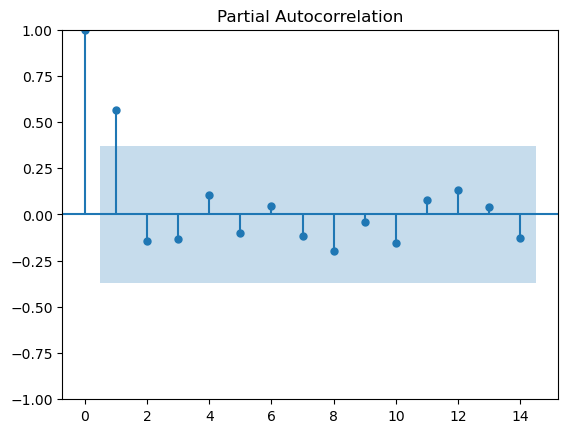

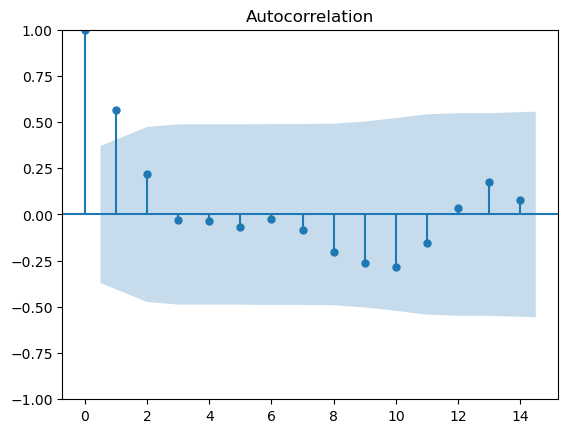

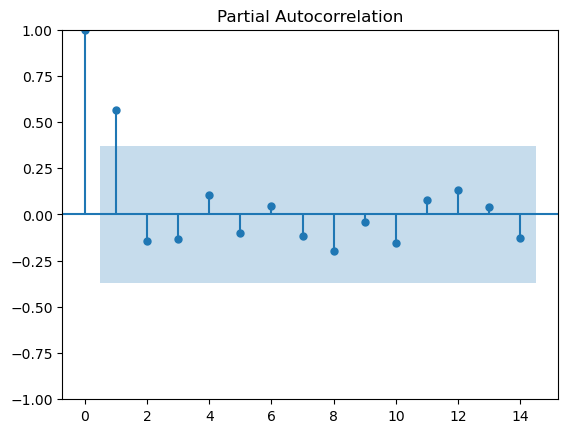

In [11]:
plot_acf(coral_cover_trend)
plot_pacf(coral_cover_trend)

### there is no observable seasonality by the line plot visualization of data,so performing statistcial test called Canova-Hansen Test  to know if any seasonality exists

In [22]:
yr_range=coral_cover_trend.index.year.max()-coral_cover_trend.index.year.min()

a = list(range(2, yr_range+1))  # Range of seasonal periods (m)
for i in a:
    seasonal_diffs = nsdiffs(coral_cover_trend, m=i, test='ch')
    print(f"For m={i}, recommended seasonal differences: {seasonal_diffs}")

For m=2, recommended seasonal differences: 0
For m=3, recommended seasonal differences: 0
For m=4, recommended seasonal differences: 0
For m=5, recommended seasonal differences: 0
For m=6, recommended seasonal differences: 0
For m=7, recommended seasonal differences: 0
For m=8, recommended seasonal differences: 0
For m=9, recommended seasonal differences: 0
For m=10, recommended seasonal differences: 0
For m=11, recommended seasonal differences: 0
For m=12, recommended seasonal differences: 0
For m=13, recommended seasonal differences: 0
For m=14, recommended seasonal differences: 0
For m=15, recommended seasonal differences: 0
For m=16, recommended seasonal differences: 0
For m=17, recommended seasonal differences: 0
For m=18, recommended seasonal differences: 0
For m=19, recommended seasonal differences: 0
For m=20, recommended seasonal differences: 0
For m=21, recommended seasonal differences: 0
For m=22, recommended seasonal differences: 0
For m=23, recommended seasonal differences

#since all the outcomes are zero which means theres no seasonality at specified range of lags
,so using seasonal period =1

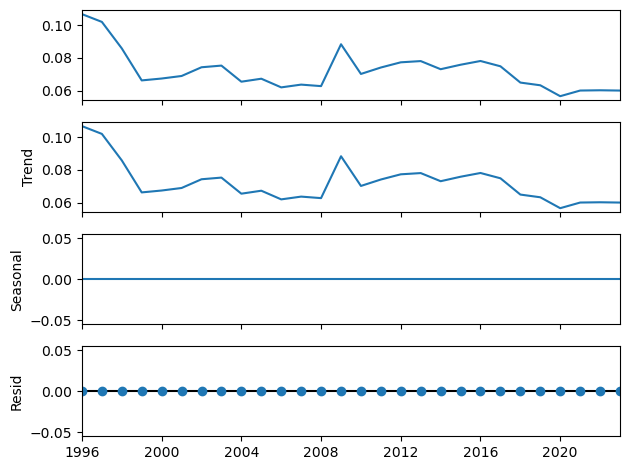

In [25]:
trend_coral=seasonal_decompose(coral_cover_trend,model='additive',period=1)
trend_coral.plot()
plt.show()

In [26]:
#above plots gives the long-term trends in stony coral percent cover 

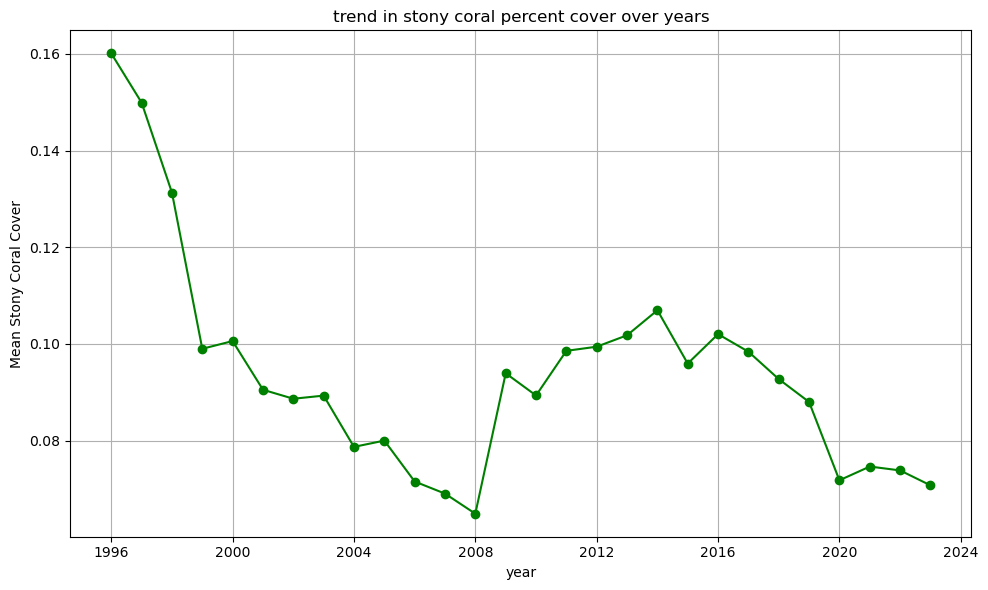

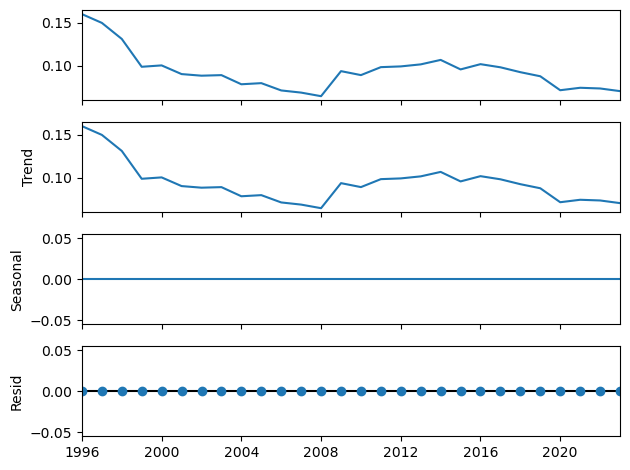

In [32]:
# if we want to know the trend of stony coral for each sub_region(default='LK')
region='LK'
coral_cover_sub_trend = taxagroups.groupby(['Year','Subregion'])['Stony_coral'].mean().reset_index()
coral_cover_sub_trend=coral_cover_sub_trend[coral_cover_sub_trend['Subregion']==region]
coral_cover_sub_trend['Year'] = pd.to_datetime(coral_cover_sub_trend['Year'], format='%Y')
coral_cover_sub_trend=coral_cover_sub_trend.drop(columns=['Subregion'])
##
plt.figure(figsize=(10,6))
plt.plot(coral_cover_sub_trend['Year'],coral_cover_sub_trend['Stony_coral'],color='green',marker='o')
plt.title('trend in stony coral percent cover over years')
plt.xlabel('year')
plt.ylabel('Mean Stony Coral Cover')
plt.grid(True)
plt.tight_layout()
plt.show()
coral_cover_sub_trend.set_index('Year', inplace=True)

sub_trend_coral=seasonal_decompose(coral_cover_sub_trend,model='additive',period=1)
sub_trend_coral.plot()
plt.show()


   OID_  Year               Date Subregion Habitat  SiteID    Site_name  \
0     1  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
1     2  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
2     3  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
3     4  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
4     5  1996  7/22/1996 0:00:00        UK      HB      11   El Radabob   

   StationID Surveyed_all_years  points  ...  Porites_porites_complex  \
0        101                  N     479  ...                      0.0   
1        102                  N     525  ...                      0.0   
2        103                  N     558  ...                      0.0   
3        104                  N     446  ...                      0.0   
4        111                  N     450  ...                      0.0   

   Pseudodiploria_clivosa  Pseudodiploria_strigosa  Scleractinia  Scolymia_sp  \
0                     0.0    

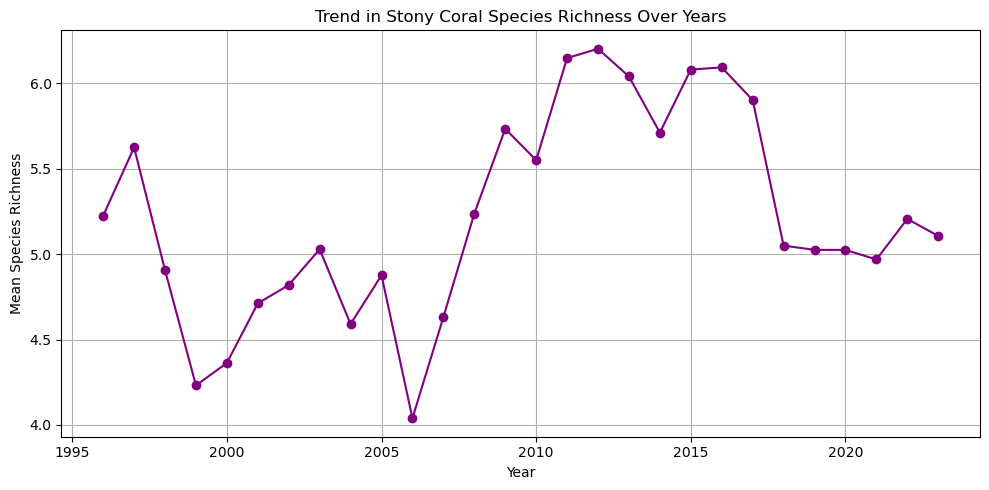

<class 'pandas.core.frame.DataFrame'>


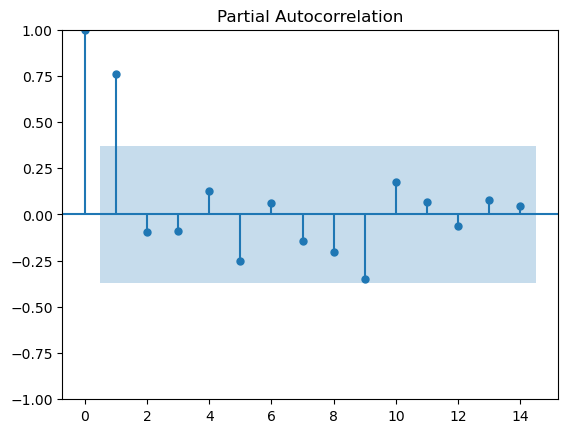

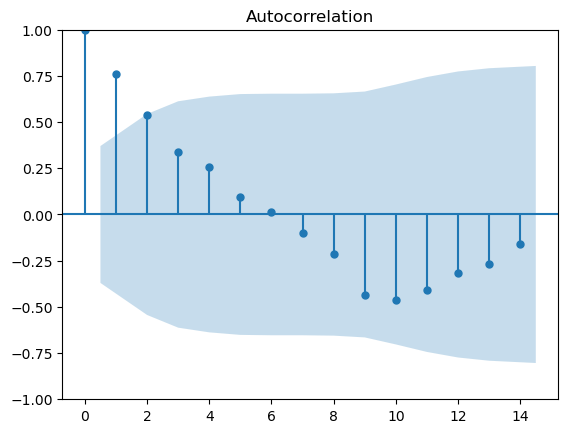

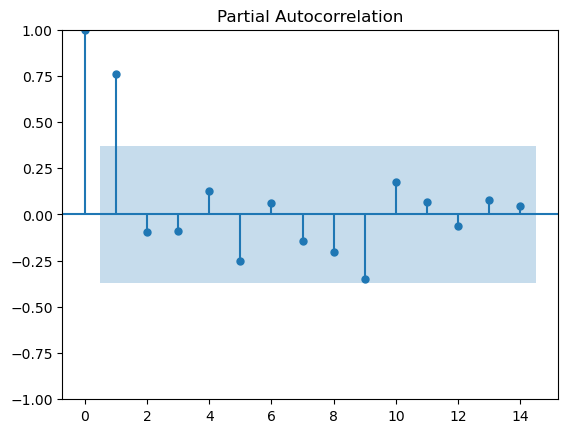

In [67]:
stony_species = pd.read_csv('CREMP_Pcover_2023_StonyCoralSpecies.csv')
print(stony_species.head())
print(stony_species.isna().sum())
print(stony_species.info())

species_cols = stony_species.columns[10:]

stony_species['Species_Richness'] = (stony_species[species_cols] > 0).sum(axis=1)

richness_trend = stony_species.groupby('Year')['Species_Richness'].mean().reset_index()


plt.figure(figsize=(10, 5))
plt.plot(richness_trend['Year'], richness_trend['Species_Richness'], marker='o', color='purple')
plt.title('Trend in Stony Coral Species Richness Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Species Richness')
plt.grid(True)
plt.tight_layout()
plt.show()

richness_trend['Year'] = pd.to_datetime(richness_trend['Year'], format='%Y')
richness_trend=richness_trend.set_index('Year')
print(type(richness_trend))
plot_acf(richness_trend)
plot_pacf(richness_trend)



In [71]:
yr_range_1=richness_trend.index.year.max()-richness_trend.index.year.min()

a = list(range(2, yr_range_1+1))  # Range of seasonal periods (m)
for i in a:
    seasonal_diffs = nsdiffs(richness_trend, m=i, test='ch')
    print(f"For m={i}, recommended seasonal differences: {seasonal_diffs}")

For m=2, recommended seasonal differences: 0
For m=3, recommended seasonal differences: 0
For m=4, recommended seasonal differences: 0
For m=5, recommended seasonal differences: 0
For m=6, recommended seasonal differences: 0
For m=7, recommended seasonal differences: 0
For m=8, recommended seasonal differences: 0
For m=9, recommended seasonal differences: 0
For m=10, recommended seasonal differences: 0
For m=11, recommended seasonal differences: 0
For m=12, recommended seasonal differences: 0
For m=13, recommended seasonal differences: 0
For m=14, recommended seasonal differences: 0
For m=15, recommended seasonal differences: 0
For m=16, recommended seasonal differences: 0
For m=17, recommended seasonal differences: 0
For m=18, recommended seasonal differences: 0
For m=19, recommended seasonal differences: 0
For m=20, recommended seasonal differences: 0
For m=21, recommended seasonal differences: 0
For m=22, recommended seasonal differences: 0
For m=23, recommended seasonal differences

#since no seasnolity at all lags from  Canova-Hansen Test since all outputs are 0
using seasonal parameter as 1 

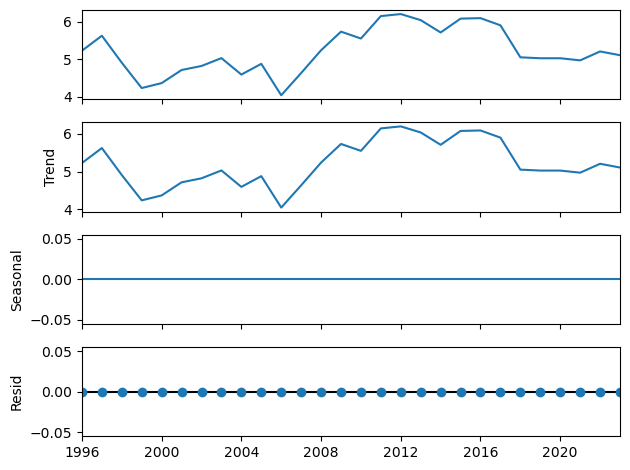

In [69]:
richness_trend1 = seasonal_decompose(richness_trend, model='additive', period=1)
richness_trend1.plot()
plt.show()


In [3]:
environmental_df = pd.read_csv(
    'CREMP_Temperatures_2023.csv',
    usecols=['Year', 'Month', 'Day', 'SiteID', 'TempC', 'TempF']
)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:

file1 = pd.read_csv("CREMP_SCOR_RawData_2023.csv")  
file2 = pd.read_csv("CREMP_Pcover_2023_TaxaGroups.csv")
file12 = pd.read_csv("CREMP_SCOR_Summaries_2023_ConditionCounts.csv")

merged_data = pd.merge(file1, file2, on=["Year", "SiteID", "Subregion"], how="inner")
merged_data = pd.merge(merged_data, file12, on=["Year", "SiteID"], how="inner")
merged_data.rename(columns={
    'Date_x': 'Date_1',  # Rename Date_x to Date_1
    'Site_name_x': 'Site_name_1',  # Rename Site_name_x to Site_name_1
    'StationID_x': 'StationID_1',  # Rename StationID_x to StationID_1
    'sciName_x': 'sciName_1',  # Rename sciName_x to sciName_1
    'Subregion_x': 'Subregion_1',  # Rename Subregion_x to Subregion_1
    'Date_y': 'Date_2',  # Rename Date_y to Date_2
    'Site_name_y': 'Site_name_2',  # Rename Site_name_y to Site_name_2
    'StationID_y': 'StationID_2',  # Rename StationID_y to StationID_2
    'sciName_y': 'sciName_2',  # Rename sciName_y to sciName_2
    'Subregion_y': 'Subregion_2',  # Rename Subregion_y to Subregion_2
}, inplace=True)
merged_data['Net_change_diameter'] = merged_data.groupby('SiteID')['Diameter_cm'].diff()

merged_data['Net_change_mortality'] = merged_data.groupby('SiteID')['Percent_recent_mortality'].diff()
merged_data['Net_change_BBD'] = merged_data.groupby('SiteID')['BBD'].diff()

In [5]:
#  numeric columns and remove groupby keys if present
group_keys = ['Year', 'Subregion_1']
numeric_cols = [col for col in merged_data.select_dtypes(include='number').columns if col not in group_keys]


#  Group and calculate the mean
sanctuary_data = merged_data.groupby(group_keys)[numeric_cols].mean().reset_index()

# trend of net changes 

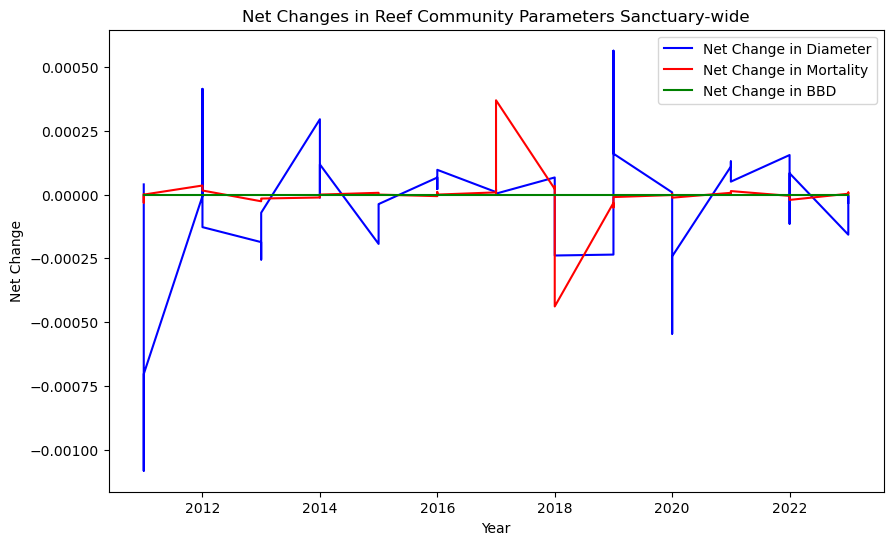

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(sanctuary_data['Year'], sanctuary_data['Net_change_diameter'], label="Net Change in Diameter", color="b")
plt.plot(sanctuary_data['Year'], sanctuary_data['Net_change_mortality'], label="Net Change in Mortality", color="r")
plt.plot(sanctuary_data['Year'], sanctuary_data['Net_change_BBD'], label="Net Change in BBD", color="g")

plt.xlabel("Year")
plt.ylabel("Net Change")
plt.title("Net Changes in Reef Community Parameters Sanctuary-wide")
plt.legend()
plt.show()


# trend of difference of net changes yearly

In [10]:
# Adding year-to-year difference
yearly_diff =sanctuary_data.copy()
yearly_diff[numeric_cols] = sanctuary_data[numeric_cols].diff()


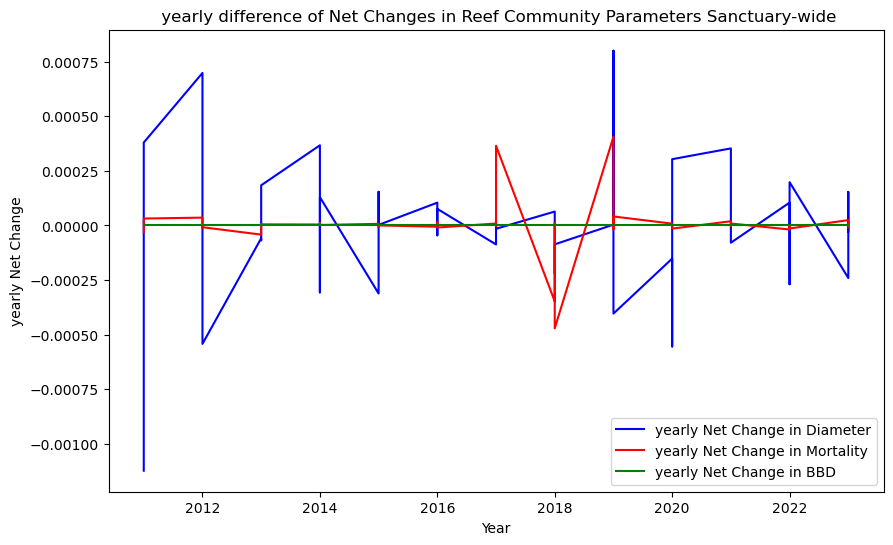

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_diff['Year'], yearly_diff['Net_change_diameter'], label="yearly Net Change in Diameter", color="b")
plt.plot(yearly_diff['Year'], yearly_diff['Net_change_mortality'], label="yearly Net Change in Mortality", color="r")
plt.plot(yearly_diff['Year'], yearly_diff['Net_change_BBD'], label="yearly Net Change in BBD", color="g")

plt.xlabel("Year")
plt.ylabel("yearly Net Change")
plt.title(" yearly difference of Net Changes in Reef Community Parameters Sanctuary-wide")
plt.legend()
plt.show()


In [12]:
merged_data.head()

,Year,Date_1,Subregion_1,Habitat_x,SiteID,Site_name_1,StationID_1,SPP_CODE,sciName_1,Diameter_cm,...,WPL,DSD,SCT,RTL,RBD,YBD,UNK,Net_change_diameter,Net_change_mortality,Net_change_BBD
0,2011,5/14/2011,LK,BCP,18,Content Keys,181,CARB,Cladocora arbuscula,6,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2011,5/14/2011,LK,BCP,18,Content Keys,181,CARB,Cladocora arbuscula,6,...,0,0,0,0,0,0,0,0.0,0.0,0.0
2,2011,5/14/2011,LK,BCP,18,Content Keys,181,CARB,Cladocora arbuscula,6,...,1,0,0,0,0,0,0,0.0,0.0,0.0
3,2011,5/14/2011,LK,BCP,18,Content Keys,181,CARB,Cladocora arbuscula,6,...,0,0,0,0,0,0,0,0.0,0.0,0.0
4,2011,5/14/2011,LK,BCP,18,Content Keys,181,CARB,Cladocora arbuscula,6,...,0,0,0,0,0,0,0,0.0,0.0,0.0


In [13]:
group_keys= ['Year']
numeric_cols = merged_data.select_dtypes(include='number').columns.difference(group_keys)

broad_summary = merged_data.groupby(group_keys)[numeric_cols].mean().reset_index()

subregion_summary = merged_data.groupby(['Year', 'Subregion_1'])[numeric_cols].mean().reset_index()

In [14]:
localized_vs_broad = pd.merge(
    subregion_summary,
    broad_summary,
    on='Year',
    suffixes=('_subregion', '_sanctuary')
)
for col in numeric_cols:
    localized_vs_broad[f'{col}_variation'] = localized_vs_broad[f'{col}_subregion'] - localized_vs_broad[f'{col}_sanctuary']
localized_vs_broad.head()


,Year,Subregion_1,BBD_subregion,BLH_subregion,Count_subregion,Cyanobacteria_subregion,DSD_subregion,Diameter_cm_subregion,Height_cm_subregion,LTA_cm2_subregion,...,Tissue_isolates_variation,UNK_variation,Unknown_variation,Urchins_variation,WBD_variation,WPL_variation,WPX_variation,YBD_variation,Zoanthidea_variation,points_variation
0,2011,LK,0.001576,0.000000,9.308310,0.023753,0.076701,16.644445,7.219371,907.514033,...,-0.052357,-0.005839,NaN,NaN,-0.001216,0.002573,-0.002041,-0.001167,-0.002430,6.918939
1,2011,MK,0.014132,0.007066,8.337639,0.008358,0.140726,16.546731,6.377654,470.592013,...,0.136696,0.016122,NaN,NaN,-0.003431,-0.016798,-0.002041,0.003443,0.009091,-7.477113
2,2011,UK,0.015959,0.000000,7.032553,0.007114,0.118095,13.390458,5.539936,435.958038,...,-0.030817,-0.004502,NaN,NaN,0.007310,0.013761,0.007752,-0.001167,-0.004768,-8.789523
3,2012,LK,0.000000,0.047989,9.881181,0.006902,0.165297,16.226745,7.168829,880.099521,...,-0.009078,-0.011440,NaN,NaN,0.000000,0.022530,-0.001277,0.000000,-0.003478,-7.588749
4,2012,MK,0.000000,0.006656,10.554450,0.002445,0.215295,14.243009,5.543753,419.053720,...,0.062357,0.023464,NaN,NaN,0.000000,-0.031754,-0.001277,0.000000,0.012644,23.406196


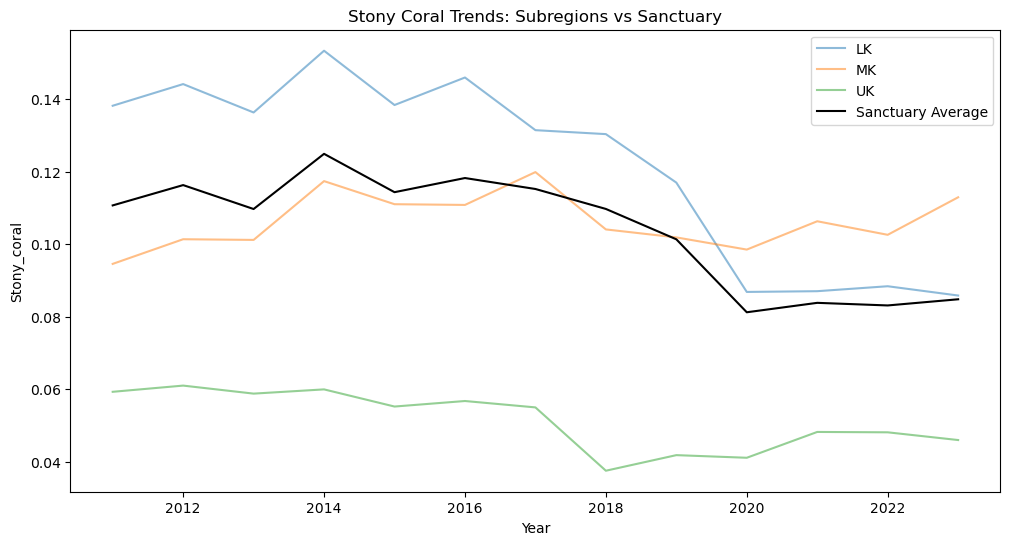

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=subregion_summary, x='Year', y='Stony_coral', hue='Subregion_1', alpha=0.5)
sns.lineplot(data=broad_summary, x='Year', y='Stony_coral', color='black', label='Sanctuary Average')
plt.title('Stony Coral Trends: Subregions vs Sanctuary')
plt.show()


In [3]:
environmental_df = pd.read_csv(
    'CREMP_Temperatures_2023.csv',
    usecols=['Year', 'Month', 'Day', 'SiteID', 'TempC', 'TempF']
)
environmental_df.head()

,SiteID,Year,Month,Day,TempC,TempF
0,10,2020,6,12,29.59,85.26
1,10,2020,6,12,29.76,85.57
2,10,2020,6,12,29.81,85.66
3,10,2020,6,12,30.19,86.34
4,10,2020,6,12,30.34,86.61


In [4]:

# Combining Year, Month, Day into a single Date column
environmental_df['Date'] = pd.to_datetime(environmental_df[['Year', 'Month', 'Day']], errors='coerce')

# Dropping columns  not needed 
environmental_df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

In [5]:
environmental_df

,SiteID,TempC,TempF,Date
0,10,29.59,85.26,2020-06-12
1,10,29.76,85.57,2020-06-12
2,10,29.81,85.66,2020-06-12
3,10,30.19,86.34,2020-06-12
4,10,30.34,86.61,2020-06-12
...,...,...,...,...
5105015,81,22.75,72.95,2024-02-22
5105016,81,22.77,72.99,2024-02-22
5105017,81,22.89,73.21,2024-02-22
5105018,81,22.92,73.25,2024-02-22


In [11]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

merged_sample = merged_data.sample(100_000, random_state=42)

sample_merge = pd.merge(
    merged_sample,
    environmental_df[['SiteID', 'Date', 'TempC', 'TempF']],
    on=['SiteID', 'Date'],
    how='left'
)


In [9]:
merged_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 18087424 to 14185620
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Year                      100000 non-null  int64  
 1   Date_1                    100000 non-null  object 
 2   Subregion_1               100000 non-null  object 
 3   Habitat_x                 100000 non-null  object 
 4   SiteID                    100000 non-null  int64  
 5   Site_name_1               100000 non-null  object 
 6   StationID_1               100000 non-null  int64  
 7   SPP_CODE                  100000 non-null  object 
 8   sciName_1                 100000 non-null  object 
 9   Diameter_cm               100000 non-null  int64  
 10  Height_cm                 100000 non-null  int64  
 11  Percent_old_mortality     99965 non-null   float64
 12  Percent_recent_mortality  99976 non-null   float64
 13  Tissue_isolates           98815 non-null

In [8]:
merged_sample.head()

,Year,Date_1,Subregion_1,Habitat_x,SiteID,Site_name_1,StationID_1,SPP_CODE,sciName_1,Diameter_cm,...,WPL,DSD,SCT,RTL,RBD,YBD,UNK,Net_change_diameter,Net_change_mortality,Net_change_BBD
18087424,2023,7/11/2023,UK,P,32,Porter Patch,324,PPOR,Porites porites,9,...,0,0,0,0,0,0,0,0.0,0.0,0.0
6954898,2015,8/6/2015,LK,P,38,Cliff Green,381,CNAT,Colpophyllia natans,31,...,0,0,0,0,0,0,0,0.0,0.0,0.0
3654380,2013,7/12/2013,LK,P,40,Jaap Reef,402,SMIC,Stephanocoenia intersepta,34,...,0,0,0,0,0,0,0,0.0,0.0,0.0
3507700,2013,7/16/2013,LK,P,38,Cliff Green,382,SMIC,Stephanocoenia intersepta,15,...,0,0,0,0,0,0,0,0.0,0.0,0.0
752800,2011,6/10/2011,UK,OS,53,Conch Shallow,531,SSID,Siderastrea siderea,8,...,0,0,0,0,0,0,0,0.0,0.0,0.0


In [12]:
coral_health_cols = [
    'Net_change_diameter', 
    'Net_change_mortality', 
    'Net_change_BBD'
]

env_cols = ['TempC', 'TempF']

# Keeping  only numeric columns for correlation
analysis_df = sample_merge[coral_health_cols + env_cols].dropna()


In [13]:
correlation_matrix = analysis_df.corr()
correlation_matrix


,Net_change_diameter,Net_change_mortality,Net_change_BBD,TempC,TempF
Net_change_diameter,1.000000,0.047680,0.000191,-0.003436,-0.003441
Net_change_mortality,0.047680,1.000000,0.000007,-0.000309,-0.000309
Net_change_BBD,0.000191,0.000007,1.000000,-0.003467,-0.003470
TempC,-0.003436,-0.000309,-0.003467,1.000000,0.999978
TempF,-0.003441,-0.000309,-0.003470,0.999978,1.000000


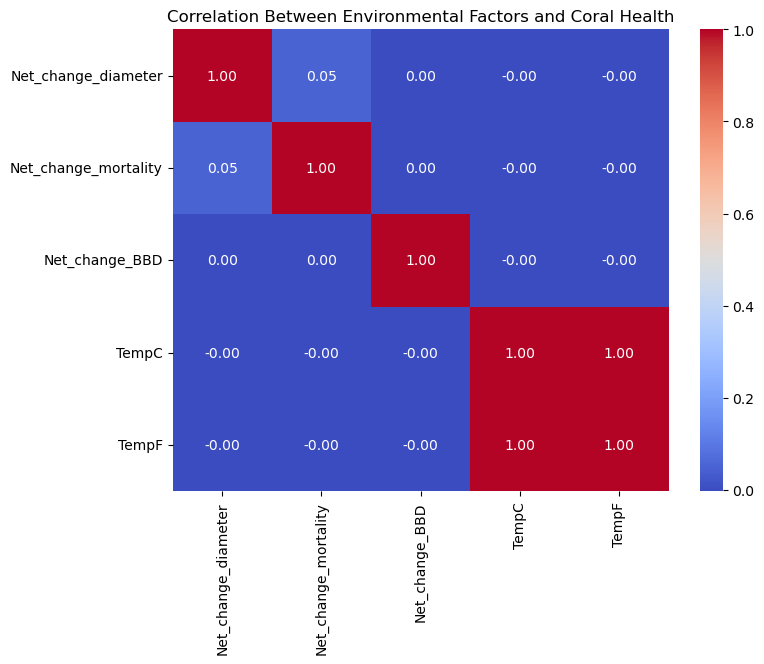

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Environmental Factors and Coral Health")
plt.show()


                        SiteID  species_richness  Net_change_diameter  \
SiteID                1.000000          0.133900             0.090076   
species_richness      0.133900          1.000000            -0.399897   
Net_change_diameter   0.090076         -0.399897             1.000000   
Net_change_mortality  0.019508         -0.191040            -0.069433   

                      Net_change_mortality  
SiteID                            0.019508  
species_richness                 -0.191040  
Net_change_diameter              -0.069433  
Net_change_mortality              1.000000  


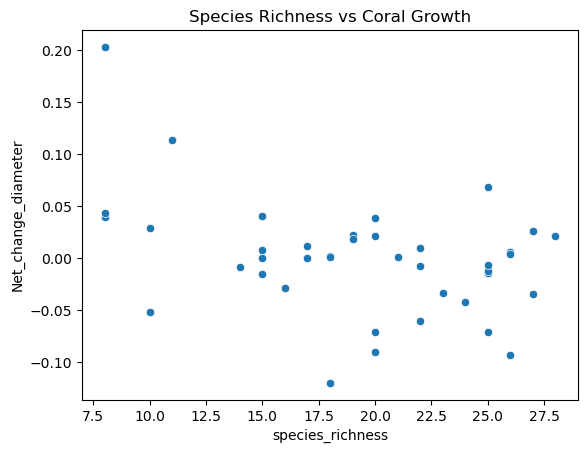

In [21]:
# Calculating biodiversity per site
biodiversity_df = sample_merge.groupby(['SiteID'])['sciName_1'].nunique().reset_index(name='species_richness')

# Merging with average coral health metrics
health_avg = sample_merge.groupby('SiteID')[['Net_change_diameter', 'Net_change_mortality']].mean().reset_index()


biodiversity_analysis = pd.merge(biodiversity_df, health_avg, on='SiteID')

# Correlation
print(biodiversity_analysis.corr())

# Scatter plot
sns.scatterplot(data=biodiversity_analysis, x='species_richness', y='Net_change_diameter')
plt.title("Species Richness vs Coral Growth")
plt.show()


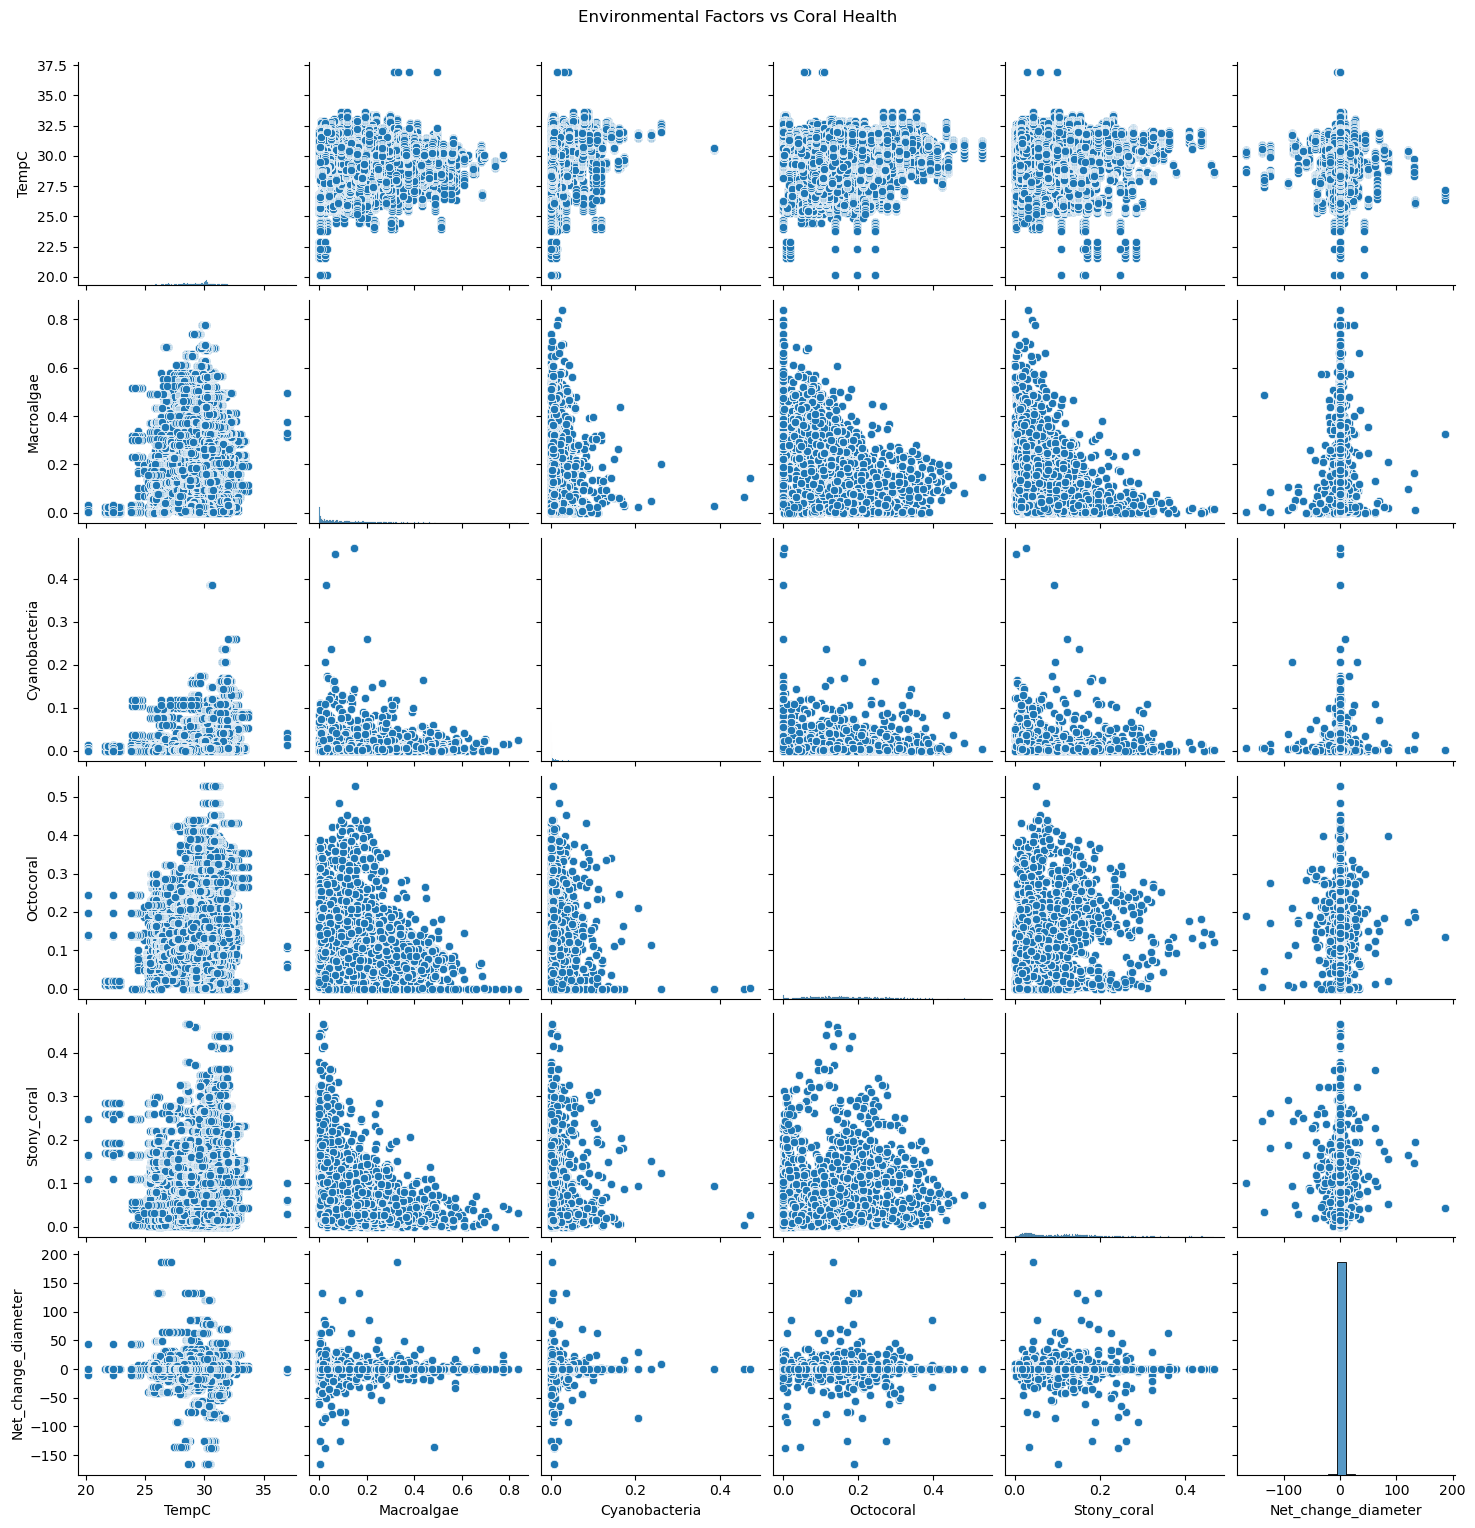

In [22]:
env_features = ['TempC', 'Macroalgae', 'Cyanobacteria', 'Octocoral', 'Stony_coral']

sns.pairplot(sample_merge[env_features + ['Net_change_diameter']])
plt.suptitle("Environmental Factors vs Coral Health", y=1.02)
plt.show()


In [24]:
features = ['TempC', 'Macroalgae', 'Cyanobacteria', 'Octocoral', 'Stony_coral']
target = 'Net_change_diameter' 


In [35]:
from sklearn.model_selection import train_test_split

X = sample_merge[features]
y = sample_merge[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R² Score: -0.013780624227813343
RMSE: 2.1421240856511483


C:\Users\saikr\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
future_scenario = X_test.copy()
future_scenario['TempC'] += 2

future_predictions = model.predict(future_scenario)

# Comparing average predicted coral health
print("Original prediction avg:", y_pred.mean())
print("With 2°C increase avg:", future_predictions.mean())


Original prediction avg: -0.00792807057499374
With 2°C increase avg: -0.010383061023783469


In [37]:
import numpy as np

# Simulating  a higher temperature ( increase by 2 degrees)
simulated_temp = X.copy()
simulated_temp['TempC'] = simulated_temp['TempC'] + 2

# Simulating more algae ( increase by 50%)
simulated_algae = X.copy()
simulated_algae['Macroalgae'] = simulated_algae['Macroalgae'] * 1.5


# Predicting coral health under different scenarios
pred_temp = model.predict(simulated_temp)
pred_algae = model.predict(simulated_algae)

# the difference in coral health
diff_temp = np.mean(pred_temp) - np.mean(y_test)
diff_algae = np.mean(pred_algae) - np.mean(y_test)

print(f"Impact of higher temperature on coral health: {diff_temp}")
print(f"Impact of more algae on coral health: {diff_algae}")


Impact of higher temperature on coral health: -0.007231710665164939
Impact of more algae on coral health: -0.00013760260539687381
